In [1]:
from utils.datahandler import DataHandler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import shap

In [2]:
datahandler = DataHandler()

datahandler.load_data()
datahandler.standarization()

df = datahandler.get_data()
X_train, X_test, y_train, y_test = datahandler.get_data_split()

In [3]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [4]:
print(f"F1 Score {f1_score(y_test, y_pred)}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))

F1 Score 1.0
Accuracy 1.0
[[850   0]
 [  0 172]]


In [40]:
shap.initjs()

explainer = shap.Explainer(rf.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer: 1023it [04:51,  3.38it/s]                          


In [ ]:
shap_values = explainer.shap_values(X_test)

In [41]:
shap_values[0]

.values =
array([ 1.29166667e-02,  0.00000000e+00,  0.00000000e+00, -4.16666667e-04,
        1.25000000e-03,  0.00000000e+00,  8.33333333e-04,  0.00000000e+00,
        0.00000000e+00,  4.16666667e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.08333333e-03,  0.00000000e+00,  1.37500000e-02,
        0.00000000e+00,  0.00000000e+00,  1.27083333e-01, -5.82916667e-01,
        1.75000000e-01])

.base_values =
0.25

.data =
array([ 1.18411639, -0.32860186, -0.2389468 , -0.74179159,  0.19575306,
       -0.22632726, -1.18950991,  1.18998977, -0.01399046, -0.72388421,
        0.72388421, -0.38411064, -0.06575636,  0.86429656, -0.43688053,
       -0.39411222,  1.01617781, -1.01617781, -0.65801073,  2.1849511 ,
       -0.7667743 ])

In [43]:
shap_values[0].shape

(21,)

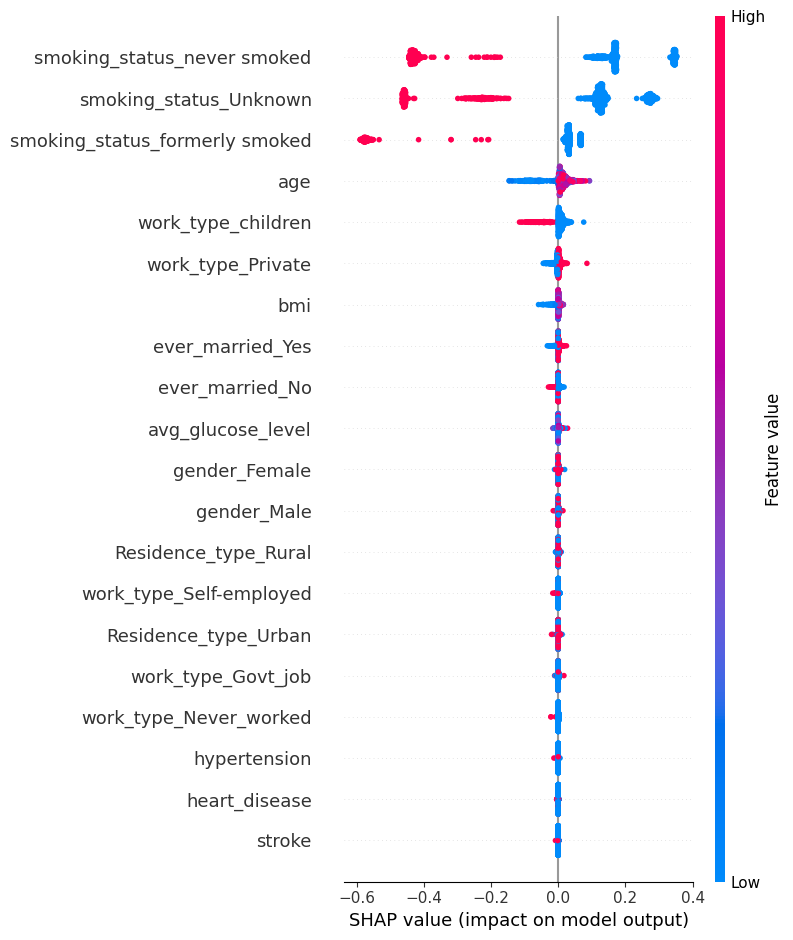

In [44]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

In [56]:
shap.plots.force(shap_values.base_values[0], 
                shap_values.values[0], 
                shap_values.data[0], 
                feature_names=X_test.columns)

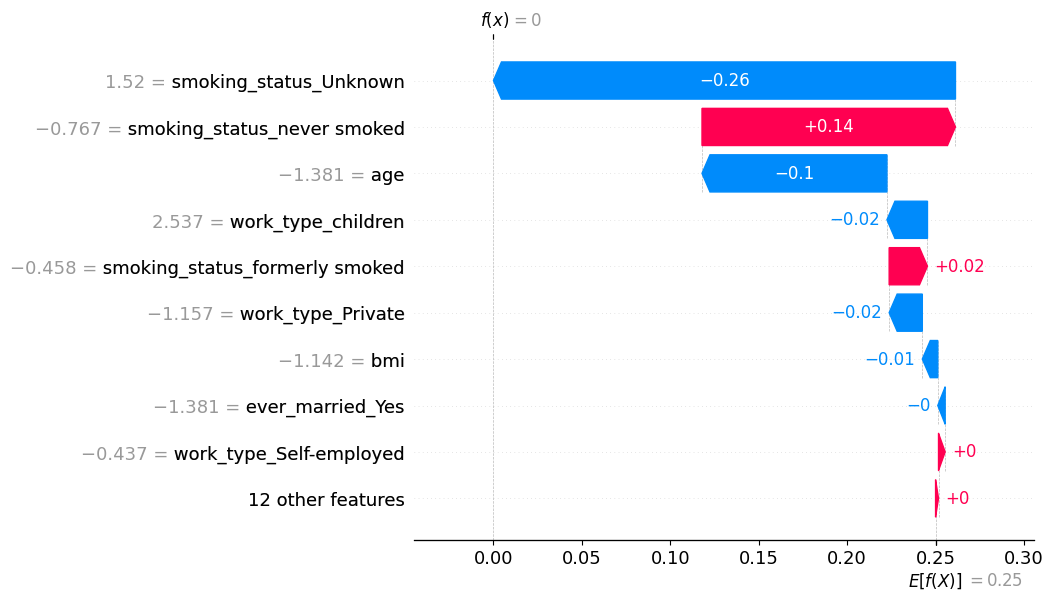

In [60]:
shap.plots.waterfall(shap_values[10])